# Assignment 5: Web Scraping and Big Data

Due date: Friday, 4/5 by 5pm

The notebook should be submitted to your own private repository on GitHub, which can be created using the following link:

https://classroom.github.com/a/2kdThMVM

### Part 1: Scraping Craigslist

In this section, you will use BeautifulSoup to scraping data for hundreds of apartments from Philadelphia's Craigslist portal.

### Part 2: Exploring a "large" dataset of your choice

In this section, you'll use datashader to create an animated timelapse of a "large" dataset of your choice.

## Part 1: Scraping Craigslist

In this part, we'll be extracting information on apartments from Craigslist search results. You'll be using BeautifulSoup to extract the relevant information from the HTML text. 

For reference on CSS selectors, please see the [notes from Week 6](https://github.com/MUSA-620-Spring-2019/week-6/blob/master/css-selectors.md).

### Getting the HTML

First we need to figure out how to submit a query to Craigslist. As with many websites, one way you can do this is simply by constructing the proper URL and sending it to Craigslist. Here's a sample URL that is returned after manually typing in a search to Craigslist:

 http://philadelphia.craigslist.org/search/apa?bedrooms=1&pets_cat=1&pets_dog=1&is_furnished=1

There are two components to this URL:

1. The base URL: `http://philadelphia.craigslist.org/search/apa`
1. The user's search parameters: `?bedrooms=1&pets_cat=1&pets_dog=1&is_furnished=1`

We will use `requests.get()` function to get the search page's response. For the search parameters, we will set `bedrooms=1`, which will make sure the number of bedrooms is listed. 

This can be done easiest by using the `params` keyword of the `get()` function. We didn't cover this in the lecture, so I've went ahead and done the necessary steps.

In [25]:
import requests
import numpy as np

In [26]:
url_base = 'http://philadelphia.craigslist.org/search/apa'
params = {'bedrooms': 1}
rsp = requests.get(url_base, params=params)

In [27]:
# Note that requests automatically created the right URL
print(rsp.url)

https://philadelphia.craigslist.org/search/apa?bedrooms=1


## 1.1 Parse the HTML

- Use BeautifulSoup to parse the HTML response.
- Use your browser's Web Inspector to identify the HTML element that holds the information on each apartment listing.
- Use BeautifulSoup to extract these elements from the HTML.

You should have a list of 120 elements, where each element is the listing for a specific apartment on the search page.

In [28]:
from bs4 import BeautifulSoup
newrsp = requests.get(url_base)
soup = BeautifulSoup(newrsp.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <title>
   philadelphia apts/housing for rent  - craigslist
  </title>
  <meta content="philadelphia apts/housing for rent  - craigslist" name="description"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible">
   <link href="https://philadelphia.craigslist.org/search/apa" rel="canonical"/>
   <link href="https://philadelphia.craigslist.org/search/apa?format=rss" rel="alternate" title="RSS feed for craigslist | philadelphia apts/housing for rent  - craigslist" type="application/rss+xml"/>
   <link href="https://philadelphia.craigslist.org/search/apa?s=120" rel="next"/>
   <meta content="width=device-width,initial-scale=1" name="viewport"/>
   <link href="//www.craigslist.org/styles/cl.css?v=281764e2707bd58e05233e4b7df36df8" media="all" rel="stylesheet" type="text/css"/>
   <link href="//www.craigslist.org/styles/search.css?v=2d972697128e23b83898e73d71ad0d39" media="all" rel="stylesheet" type="text/css"/>
   <link href="//www.craigslist

## 1.2 Find the relevant pieces of information

We will now focus on the first element in the list of 120 apartments. Use the `prettify()` function to print out the HTML for this first element. 

From this HTML, identify the HTML elements that hold:

- The apartment price
- The number of bedrooms and square footage (this will be in a single element)
- The apartment title
- The datetime string of the posting, e.g., '2019-03-23 12:07'

For the first apartment, print out each of these pieces of information, using BeautifulSoup to select the proper elements.

**Hint:** Each of these can be extracted using the `text` attribute of the selected element object, except for the datetime string. This information is stored as an *attribute* of an HTML element and is not part of the displayed text on the webpage.

In [29]:
# method1: select_one
selector = "#sortable-results > ul > li:nth-child(1)"
firstrow = soup.select_one(selector)
print(firstrow)

<li class="result-row" data-pid="6860660032">
<a class="result-image gallery" data-ids="1:00606_iUpPnpEhK0C,1:00k0k_374D2LoY8Dy,1:01212_i6BD5sHd9rk,1:00e0e_1f3DleGgZFe,1:00N0N_j9eznVOf4mj,1:00b0b_h0iwQaxrAhx,1:00X0X_8GcXjQ3Lcyj,1:00202_hgqrN6DAwtq,1:00909_3vnIQLfe1D8" href="https://philadelphia.craigslist.org/apa/d/philadelphia-cozy-spruce-st-1br-w-in/6860660032.html">
<span class="result-price">$1250</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2019-04-07 18:06" title="Sun 07 Apr 06:06:36 PM">Apr  7</time>
<a class="result-title hdrlnk" data-id="6860660032" href="https://philadelphia.craigslist.org/apa/d/philadelphia-cozy-spruce-st-1br-w-in/6860660032.html">Cozy Spruce St 1BR w/ W/D In Unit, Heat Included, D/W, and Central Air</a>
<span class="result-meta">
<span class="result-price">$1250</span>
<span class="housing">
                    1br -
    

In [30]:
# method2: select
rows = soup.select('li.result-row')
len(rows)

120

In [31]:
# get the first row
# same as the firstrow of the last method
row = rows[0]
print(row)

<li class="result-row" data-pid="6860660032">
<a class="result-image gallery" data-ids="1:00606_iUpPnpEhK0C,1:00k0k_374D2LoY8Dy,1:01212_i6BD5sHd9rk,1:00e0e_1f3DleGgZFe,1:00N0N_j9eznVOf4mj,1:00b0b_h0iwQaxrAhx,1:00X0X_8GcXjQ3Lcyj,1:00202_hgqrN6DAwtq,1:00909_3vnIQLfe1D8" href="https://philadelphia.craigslist.org/apa/d/philadelphia-cozy-spruce-st-1br-w-in/6860660032.html">
<span class="result-price">$1250</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2019-04-07 18:06" title="Sun 07 Apr 06:06:36 PM">Apr  7</time>
<a class="result-title hdrlnk" data-id="6860660032" href="https://philadelphia.craigslist.org/apa/d/philadelphia-cozy-spruce-st-1br-w-in/6860660032.html">Cozy Spruce St 1BR w/ W/D In Unit, Heat Included, D/W, and Central Air</a>
<span class="result-meta">
<span class="result-price">$1250</span>
<span class="housing">
                    1br -
    

In [32]:
price = row.select_one('.result-price').text
bedrooms = row.select_one('.housing').text
title = row.select_one('.result-title').text
time = row.select_one('.result-date')['datetime']
print(price)

$1250


## 1.3 Functions to format the results 

In this section, you'll create two functions that take the price and time results from the last section and format them properly.

I've provided a function that will format the size and bedrooms string properly (no additional work needed), and started two functions to format the price and time. You should finish theses functions in this section.

In [33]:
import re

In [34]:
def format_size_and_bedrooms(size_string):
    """
    Extract size and number of bedrooms from the raw
    text, using regular expressions
    """
    split = re.findall("\n(.*?) -", size_string)
    
    # both size and bedrooms are listed
    if len(split) == 2:
        n_brs = split[0].strip().replace('br', '')
        this_size = split[1].strip().replace('ft2', '')
    # only bedrooms is listed
    elif 'br' in split[0]:
        n_brs = split[0].strip().replace('br', '')
        this_size = np.nan
    # only size is listed
    elif 'ft2' in split[0]:
        # It's the size
        this_size = split[0].strip().replace('ft2', '')
        n_brs = np.nan
    
    # return floats
    return float(this_size), float(n_brs)

In [35]:
format_size_and_bedrooms(bedrooms)

(nan, 1.0)

In [36]:
# remove the dollar sign and return a float
def format_price(price_string):
    number = price_string.strip('$')
    return float(number)

In [37]:
format_price(price)

1250.0

In [38]:
from datetime import datetime

In [39]:
# Return a Datetime object from the datetime string
def format_time(date_string):
    stamp = datetime.strptime(date_string,'%Y-%m-%d %H:%M')
    return stamp

In [40]:
format_time(time)

datetime.datetime(2019, 4, 7, 18, 6)

## 1.4: Putting it all together

In this part, you'll complete the code block below using results from previous parts. The code will loop over 4 pages of search results and scrape data for about 500 apartments.

In the code below, the outer for loop will loop over 4 pages of search results. The inner for loop will loop over the 120 apartments listed on each search page.

After filling in the missing pieces and executing the code cell, you should have a Data Frame called `results` that holds the data for 480 apartment listings.

#### Notes

Be careful if you try to scrape more listings. Craigslist will temporarily ban your IP address (for a very short time) if you scrape too much at once. I've added a `sleep()` function to the for loop to wait 30 seconds between scraping requests.

If the for loop gets stuck at the "Processing page X..." step for more than a minute or so, your IP address is probably banned temporarily, and you'll have to wait a few minutes before trying again.

In [41]:
from time import sleep
import numpy as np
import pandas as pd

In [42]:
results = []

max_pages = 4
results_per_page = 120
search_indices = np.arange(0, max_pages*results_per_page + 1, results_per_page) 
url = 'http://philadelphia.craigslist.org/search/apa'

# loop over each page of search results
for i, s in enumerate(search_indices):
    print('Processing page %s...' % (i+1) )
    
    # get the response
    resp = requests.get(url, params={'bedrooms': 1, 's': s})
    
    # YOUR CODE: get the list of all aparements
    # This is the same code from Part 1.1
    # It should be a list of 120 apartments
    soup = BeautifulSoup(resp.content, 'html.parser')
    apts = soup.select('li.result-row')
    print("number of apartments = ", len(apts))

    # loop over each apartment in the list
    page_results = []
    for apt in apts:
        
        # YOUR CODE: the bedrooms/size string
        sizes_brs = apt.select_one('.housing').text

        # YOUR CODE: the title string
        title = apt.select_one('.result-title').text

        # YOUR CODE: the price string
        price = apt.select_one('.result-price').text

        # YOUR CODE: the time string
        dtime = apt.select_one('.result-date')['datetime']
        
        # format using functions from Part 1.3
        sizes, brs = format_size_and_bedrooms(sizes_brs)
        price = format_price(price)
        dtime = format_time(dtime)
        
        # save the result
        page_results.append([dtime, price, sizes, brs, title])
        
    
    # create a dataframe and save
    col_names = ['time', 'price', 'size', 'brs', 'title']
    df = pd.DataFrame(page_results, columns=col_names)
    results.append(df)
    
    print("sleeping for 30 seconds between calls")
    sleep(30)
    
# Finally, concatenate all the results
results = pd.concat(results, axis=0)

Processing page 1...
number of apartments =  120
sleeping for 30 seconds between calls
Processing page 2...
number of apartments =  120
sleeping for 30 seconds between calls
Processing page 3...
number of apartments =  120
sleeping for 30 seconds between calls
Processing page 4...
number of apartments =  120
sleeping for 30 seconds between calls
Processing page 5...
number of apartments =  120
sleeping for 30 seconds between calls


In [43]:
results.head()

,time,price,size,brs,title
0,2019-04-07 18:10:00,1500.0,NaN,1.0,Loft Style 1 Bedroom / 1 1/2 Bathroom in Cente...
1,2019-04-07 18:10:00,1505.0,NaN,1.0,1 Bedroom / 1 Bathroom in Center City $500 Dep...
2,2019-04-07 18:09:00,1625.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 De..."
3,2019-04-07 18:09:00,1455.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 Se..."
4,2019-04-07 18:08:00,1455.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 De..."


## 1.5: Plotting the distribution of prices

Use matplotlib's `hist()` function to make two histograms for:

- Apartment prices
- Apartment prices per square foot (price / size)

Make sure to add labels to the respective axes and a title describing the plot.

### Side note: rental prices per sq. ft. from Craigslist

The histogram of price per sq ft should be centered around ~1.5. Here is a plot of how Philadelphia's rents compare to the other most populous cities:

<img src="imgs/rental_prices_psf.png" width=600/>

[Source](https://arxiv.org/pdf/1605.05397.pdf)

In [44]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [45]:
#calculate the squareprice
results['squareprice'] = results['price']/results['size']
results.head()

,time,price,size,brs,title,squareprice
0,2019-04-07 18:10:00,1500.0,NaN,1.0,Loft Style 1 Bedroom / 1 1/2 Bathroom in Cente...,NaN
1,2019-04-07 18:10:00,1505.0,NaN,1.0,1 Bedroom / 1 Bathroom in Center City $500 Dep...,NaN
2,2019-04-07 18:09:00,1625.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 De...",NaN
3,2019-04-07 18:09:00,1455.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 Se...",NaN
4,2019-04-07 18:08:00,1455.0,NaN,1.0,"1 Bedroom / 1 Bathroom in Center City, $500 De...",NaN


Text(0.5, 1.0, 'Number of Apartment by Price')

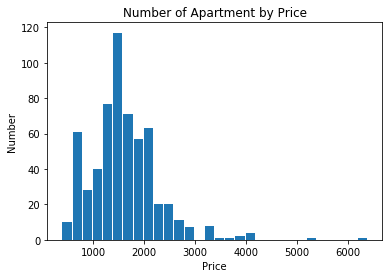

In [46]:
# Apartment prices histogram
# set up the labels and aixes 
plt.hist(results.price, bins=30,rwidth=0.9)
plt.xlabel('Price')  
plt.ylabel('Number')  
plt.title(r'Number of Apartment by Price')  

Text(0.5, 1.0, 'Number of Apartment by Prices per square foot')

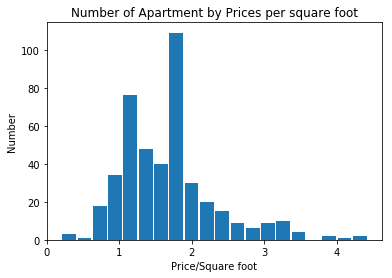

In [48]:
# Apartment prices by sqaure foot histogram
plt.hist(results.squareprice, bins=20,rwidth=0.9)
plt.xlabel('Price/Square foot')  
plt.ylabel('Number')  
plt.title(r'Number of Apartment by Prices per square foot')  

## 1.6 Comparing prices for different sizes 

Use `altair` to explore the relationship between price, size, and number of bedrooms. Make an interactive scatter plot of price (x-axis) vs. size (y-axis), with the points colored by the number of bedrooms. 

Make sure the plot is interactive (zoom-able and pan-able) and add a tooltip with all of the columns in our scraped data frame.

With this sort of plot, you can quickly see the outlier apartments in terms of size and price.

In [49]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

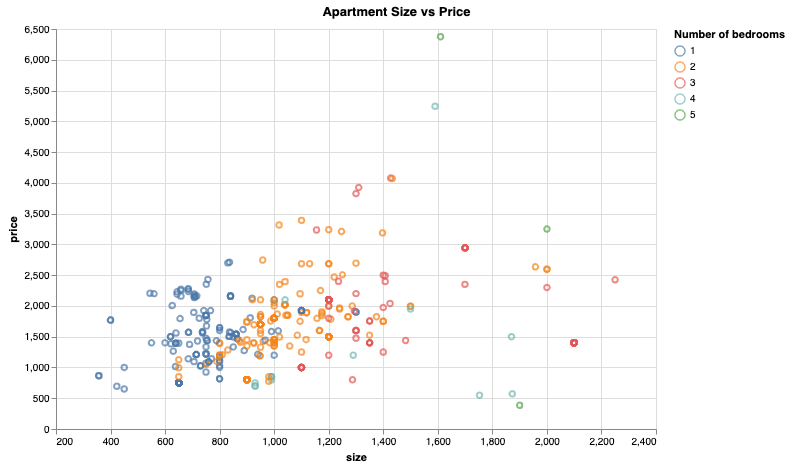

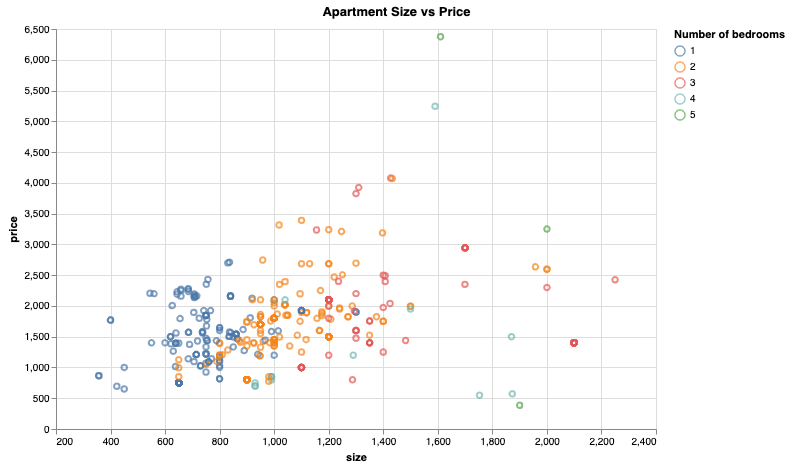

In [50]:
alt.Chart(results).mark_point().encode(
    alt.X('size:Q',
        scale=alt.Scale(domain=(300, 2400))),
    alt.Y('price:Q',
        scale=alt.Scale(zero=False)),
    color=alt.Color('brs:N', legend=alt.Legend(title="Number of bedrooms")),
    tooltip=['title', 'price', 'brs', 'size']
).properties(
    height=400,
    width=600,
    title='Apartment Size vs Price'
).interactive()

## Part 2: Making an animated map with Datashader

In this part, you will load a "large" data set of your choice and make an animated map of the data using datashader. 

There are several good options available from Open Data Philly, but you are welcome to choose a different source, as long it meets the requirements below.

#### Deliverable
Your final result should be a GIF animating changes in the data set in time. This GIF should be submitted to your repository, and the code used to produce the GIF should be in the notebook.

#### Notes
- For best results with datashader, the dataset should be at least 500,000 rows in size. If you are having difficulty finding a data set large enough, please email me.
- The data must have a date time column, so that you can animate the data in time.
- You can use either dask or pandas to load the data. If you're data set is approaching the size of your machine's memory, you will want to use dask.
- Recommendations from Open Data Philly include: 
    - [311 Requests](https://www.opendataphilly.org/dataset/311-service-and-information-requests)
    - [Crime Incidents](https://www.opendataphilly.org/dataset/crime-incidents)
    - [L&I Code Violations](https://www.opendataphilly.org/dataset/licenses-and-inspections-violations)
    - [Parking Violations](https://www.opendataphilly.org/dataset/parking-violations)
    - [Real Estate Transfers](https://www.opendataphilly.org/dataset/real-estate-transfers)
- You can animate the data by the hour or by the year, e.g., parking violations by hour of day, or parking violations by year.

**Remember: when using datashader your data's coordinates should be in Web Mercator (EPSG coe 3857).**

**Examples:** I've includes several example GIFS in the assignment repository. Note that you are not required to add the city limits boundary to your GIFs, as I have done in the examples.

In [51]:
import dask.dataframe as dd
import datashader as ds
from colorcet import fire
import datashader.transfer_functions as tf
import holoviews as hv
from holoviews.operation.datashader import datashade
import imageio

In [52]:
from pyrestcli.auth import NoAuthClient
from carto.sql import SQLClient

import geopandas as gpd
API_endpoint = "https://phl.carto.com"
sql_client = SQLClient(NoAuthClient(API_endpoint))
query = "SELECT * FROM incidents_part1_part2" 
features = sql_client.send(query, format='geojson')
df2 = gpd.GeoDataFrame.from_features(features,crs={'init':'epsg:3857'})
df2.head()

/anaconda3/envs/musa-620/lib/python3.6/site-packages/pyrestcli/auth.py:79: UserWarning: You are using methods other than get with no authentication!!!
  warnings.warn(_("You are using methods other than get with no authentication!!!"))


,cartodb_id,dc_dist,dc_key,dispatch_date,dispatch_date_time,dispatch_time,geometry,hour_,location_block,objectid,point_x,point_y,psa,text_general_code,ucr_general
0,1,01,201501056051,2015-12-17,2015-12-17T07:26:00Z,07:26:00,POINT (-75.17317199999999 39.928303),7,1800 BLOCK S CHADWICK ST,340,-75.173172,39.928303,1,Vandalism/Criminal Mischief,1400
1,2,01,201501056080,2015-12-17,2015-12-17T11:04:00Z,11:04:00,POINT (-75.172603 39.925975),11,1500 BLOCK MC KEAN ST,341,-75.172603,39.925975,1,Vandalism/Criminal Mischief,1400
2,3,01,201501056360,2015-12-18,2015-12-18T22:55:00Z,22:55:00,POINT (-75.17508100000001 39.922675),22,2200 BLOCK S 17TH ST,342,-75.175081,39.922675,1,Vandalism/Criminal Mischief,1400
3,4,01,201501056375,2015-12-19,2015-12-19T00:54:00Z,00:54:00,POINT (-75.174745 39.923722),0,2200 BLOCK S 17TH ST,343,-75.174745,39.923722,1,Vandalism/Criminal Mischief,1400
4,5,01,201501056502,2015-12-20,2015-12-20T01:07:00Z,01:07:00,POINT (-75.17268300000001 39.926027),1,S 16TH ST / MC KEAN ST,344,-75.172683,39.926027,1,Vandalism/Criminal Mischief,1400


In [53]:
points = hv.Points(df2, kdims=['point_x', 'point_y'])

In [55]:
datashade(points, cmap=fire).opts(width=700, height=700, bgcolor="black")

:DynamicMap   []

In [56]:
# define the range and plot size
philly = x_range, y_range = ((-75.337143,-74.904440), (39.870267,40.158289))

plot_width  = int(900)
plot_height = int(plot_width//1.15)

In [57]:
def create_image(df, x_range, y_range, w=plot_width, h=plot_height, cmap=fire):
    
    # create the canvas
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    
    # plot dropoff positions, coutning number of passengers
    agg = cvs.points(df, 'point_x', 'point_y')
    
    # shade
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    
    # return an PIL image
    return tf.set_background(img, "black").to_pil()

In [58]:
def convert_to_12hour(hr24):
    """
    Convert from 24 hr to 12 hr.
    """
    from datetime import datetime
    d = datetime.strptime(str(hr24), "%H")
    return d.strftime("%I %p")

In [59]:
def plot_incidents_by_hour(fig, df, hour):
    """
    Plot the dropoffs for particular hour
    """
    # generate the datashader image
    df = df.loc[df['hour_']==hour]
    img = create_image(df, *philly)
    
    # plot the image on a matplotlib axes
    plt.clf()
    ax = fig.gca()
    ax.imshow(img)
    ax.axis('off')
    
    # add a text label for the hour
    ax.text(0.05, 0.9, convert_to_12hour(hour), color='white', 
            fontsize=30, ha='left', transform=ax.transAxes)
    
    # draw the figure and return the image
    fig.canvas.draw()   
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

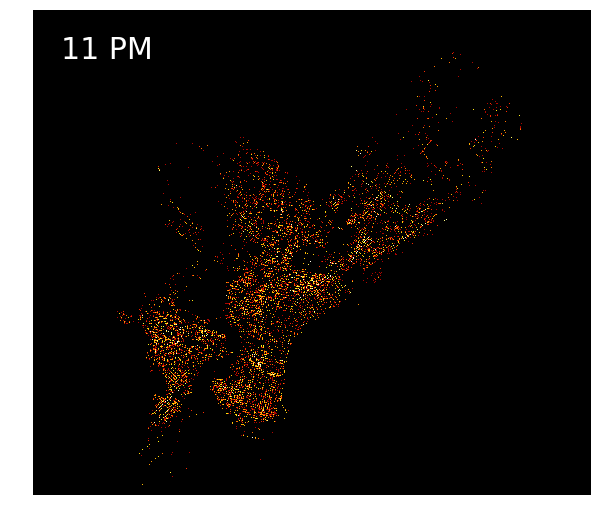

In [60]:
# create a figure
fig, ax = plt.subplots(figsize=(10,10))

# save the GIF
hours = range(24)
imageio.mimsave('incidents_by_hour.gif', [plot_incidents_by_hour(fig, df2, hr) for hr in hours], fps=1);